In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data[['normalizedAmount', 'Amount']].head()

,normalizedAmount,Amount
0,0.244964,149.62
1,-0.342475,2.69
2,1.160686,378.66
3,0.140534,123.50
4,-0.073403,69.99


In [4]:
X = data.drop(['Time', 'Amount', 'Class'], axis=1)
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [6]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train.values.ravel())
predictions = cls.predict(X_test)

In [7]:
cls.score(X_test, y_test)

0.9989115550718023

[[85243    44]
 [   49   107]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.71      0.69      0.70       156

    accuracy                           1.00     85443
   macro avg       0.85      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



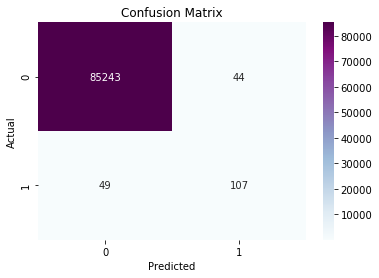

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, predictions)
print(cm)
print()
cr = classification_report(y_test, predictions)
print(cr)

sn.heatmap(cm, annot=True, cmap='BuPu', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()